Sai Vasanth Kattamuri

In [ ]:
import time, psutil, os

# Data manipulation
import numpy as np
import pandas as pd

# Plotting and visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_theme()
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# NLP
import string, re, nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
!pip install num2words
from num2words import num2words
!pip install pyspellchecker
from spellchecker import SpellChecker
from nltk.stem.porter import PorterStemmer
import spacy
from nltk.stem import WordNetLemmatizer

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Scipy
import scipy
from scipy import sparse
from scipy.sparse import csr_matrix

# Train-test split and cross validation
from sklearn.model_selection import train_test_split, ParameterGrid

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# Model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Others
import json
import gensim
from sklearn.decomposition import TruncatedSVD

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 26.6 MB/s 
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=98f67e96cd77eeba46f883c9d53d426633899b402d255d4bfc313e3b3586a758
  Stored in directory: /root/.cache/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 19.1 MB/s 


In [ ]:
# Loading and customizing the data
data = pd.read_csv('/content/ecommerceDataset.csv',
    names = ['label', 'description']
)
data = data[['description', 'label']]

print(pd.Series({"Memory usage": "{:.2f} MB".format(data.memory_usage().sum()/(1024*1024)),
                 "Dataset shape": "{}".format(data.shape)}).to_string())
data

Memory usage        0.77 MB
Dataset shape    (50425, 2)


,description,label
0,Paper Plane Design Framed Wall Hanging Motivat...,Household
1,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",Household
2,SAF 'UV Textured Modern Art Print Framed' Pain...,Household
3,"SAF Flower Print Framed Painting (Synthetic, 1...",Household
4,Incredible Gifts India Wooden Happy Birthday U...,Household
...,...,...
50420,Strontium MicroSD Class 10 8GB Memory Card (Bl...,Electronics
50421,CrossBeats Wave Waterproof Bluetooth Wireless ...,Electronics
50422,Karbonn Titanium Wind W4 (White) Karbonn Titan...,Electronics
50423,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou...",Electronics


In [ ]:
data.skew()

<ipython-input-3-b3b431164adb>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Series([], dtype: float64)

In [ ]:
# Example description
data['description'].iloc[5]

'Pitaara Box Romantic Venice Canvas Painting 6mm Thick Mdf Frame 21.1 X 14Inch Enclosure Material:MDF Mount Frame                                                                                \xa0|\xa0                           Size:21.1inch x 14inch (53.6cms x 35.6cms)   SIZE: 21.1 inch x 14.0 inch (53.6 cms x 35.6 cms)  Enhance the beauty of your room walls with this breathtaking digital printed artwork. Our high-end printing technology captures every detail of the image in our prints on enhanced matte painting canvas, ensuring rich and lively colours. This wall art panel is mounted on MDF and ready to hang on walls. Beautiful interior home d©cor artwork gifts for Living, Dining Room, Outdoor, Gallery, Hotels, Restaurants, Office, Reception, Kitchen Area, Balcony and Bathroom.  Pitaara Box offers an exclusive collection of thousands of artworks, digital paintings, canvas prints, wall posters, and other wall decor products for your home, office, and surroundings. We provide a never-e

In [ ]:
# Missing values and duplicate observations
print(pd.Series({"Number of observations with missing values": len(data) - len(data.dropna()),
                 "Number of duplicate observations": data.duplicated().sum()}).to_string())

Number of observations with missing values        1
Number of duplicate observations              22622


In [ ]:
data.dropna(inplace = True) # Dropping observations with missing values
data.drop_duplicates(inplace = True) # Dropping duplicate observations
data.reset_index(drop = True, inplace = True) # Resetting index

**The labels are manually encoded with the following scheme:**

Electronics: 0

Household: 1

Books: 2

Clothing & Accessories: 3

In [ ]:
# Manual encoding of labels
label_dict = {'Electronics': 0, 'Household': 1, 'Books': 2, 'Clothing & Accessories': 3}
data.replace({'label': label_dict}, inplace = True)

print(pd.Series({"Memory usage": "{:.2f} MB".format(data.memory_usage().sum()/(1024*1024)),
                 "Dataset shape": "{}".format(data.shape)}).to_string())
data

Memory usage        0.42 MB
Dataset shape    (27802, 2)


,description,label
0,Paper Plane Design Framed Wall Hanging Motivat...,1
1,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",1
2,SAF 'UV Textured Modern Art Print Framed' Pain...,1
3,"SAF Flower Print Framed Painting (Synthetic, 1...",1
4,Incredible Gifts India Wooden Happy Birthday U...,1
...,...,...
27797,Micromax Bharat 5 Plus Zero impact on visual d...,0
27798,Microsoft Lumia 550 8GB 4G Black Microsoft lum...,0
27799,"Microsoft Lumia 535 (Black, 8GB) Colour:Black ...",0
27800,Karbonn Titanium Wind W4 (White) Karbonn Titan...,0


In [ ]:
# Splitting the dataset by label
data_e = data[data['label'] == 0] # Electronics
data_h = data[data['label'] == 1] # Household
data_b = data[data['label'] == 2] # Books
data_c = data[data['label'] == 3] # Clothing & Accessories

In [ ]:
# Visualization of class frequencies
values = np.array([len(data_e), len(data_h), len(data_b), len(data_c)])
labels = ['Electronics', 'Household', 'Books', 'Clothing & Accessories']
fig = go.Figure(data = [go.Pie(values = values, labels = labels, hole = 0.5, textinfo = 'percent', title = " ")])
text_title = "Comparison of class frequencies"
fig.update_layout(height = 50, width = 80, showlegend = True, title = dict(text = text_title, x = 0.5, y = 0.95))
fig.show()

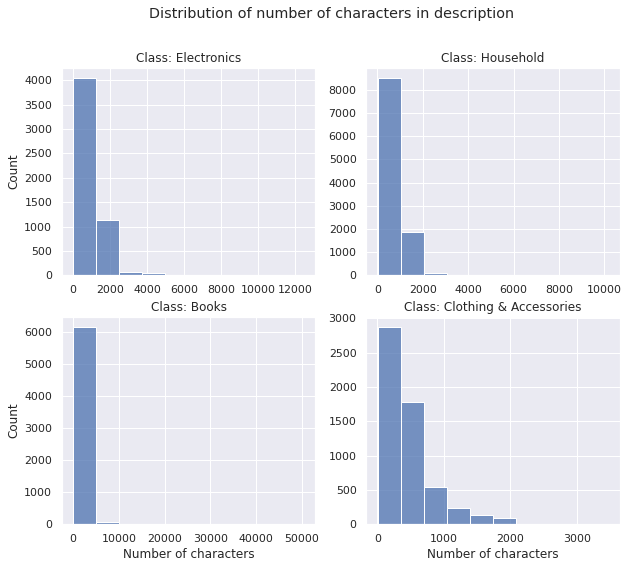

In [ ]:
# Distribution of number of characters in description
data_e_char = data_e['description'].str.len()
data_h_char = data_h['description'].str.len()
data_b_char = data_b['description'].str.len()
data_c_char = data_c['description'].str.len()

fig, ax = plt.subplots(2, 2, figsize = (10, 8.4), sharey = False)
sns.histplot(x = data_e_char, bins = 10, ax = ax[0, 0]).set_title('Class: Electronics')
sns.histplot(x = data_h_char, bins = 10, ax = ax[0, 1]).set_title('Class: Household')
sns.histplot(x = data_b_char, bins = 10, ax = ax[1, 0]).set_title('Class: Books')
sns.histplot(x = data_c_char, bins = 10, ax = ax[1, 1]).set_title('Class: Clothing & Accessories')

fig.suptitle("Distribution of number of characters in description")
for i in range(4):
    ax[i // 2, i % 2].set_xlabel(" ") if i // 2 == 0 else ax[i // 2, i % 2].set_xlabel("Number of characters")
    if i % 2 != 0: ax[i // 2, i % 2].set_ylabel(" ")

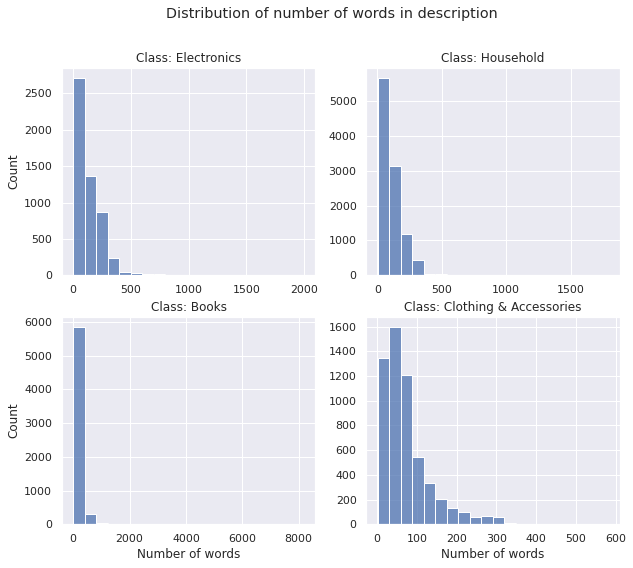

In [ ]:
# Distribution of number of words in description
data_e_word = data_e['description'].str.split().map(lambda x: len(x))
data_h_word = data_h['description'].str.split().map(lambda x: len(x))
data_b_word = data_b['description'].str.split().map(lambda x: len(x))
data_c_word = data_c['description'].str.split().map(lambda x: len(x))

fig, ax = plt.subplots(2, 2, figsize = (10, 8.4), sharey = False)
sns.histplot(x = data_e_word, bins = 20, ax = ax[0, 0]).set_title('Class: Electronics')
sns.histplot(x = data_h_word, bins = 20, ax = ax[0, 1]).set_title('Class: Household')
sns.histplot(x = data_b_word, bins = 20, ax = ax[1, 0]).set_title('Class: Books')
sns.histplot(x = data_c_word, bins = 20, ax = ax[1, 1]).set_title('Class: Clothing & Accessories')

fig.suptitle("Distribution of number of words in description")
for i in range(4):
    ax[i // 2, i % 2].set_xlabel(" ") if i // 2 == 0 else ax[i // 2, i % 2].set_xlabel("Number of words")
    if i % 2 != 0: ax[i // 2, i % 2].set_ylabel(" ")

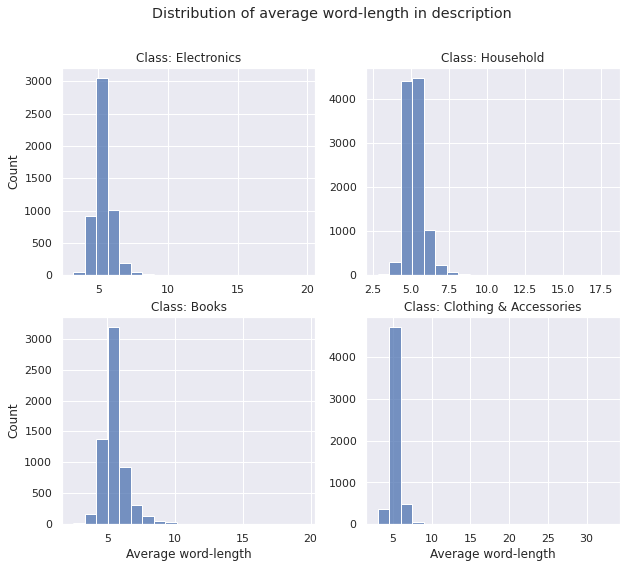

In [ ]:
# Distribution of average word-length in description
data_e_avg = data_e['description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
data_h_avg = data_h['description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
data_b_avg = data_b['description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
data_c_avg = data_c['description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))

fig, ax = plt.subplots(2, 2, figsize = (10, 8.4), sharey = False)
sns.histplot(x = data_e_avg, bins = 20, ax = ax[0, 0]).set_title('Class: Electronics')
sns.histplot(x = data_h_avg, bins = 20, ax = ax[0, 1]).set_title('Class: Household')
sns.histplot(x = data_b_avg, bins = 20, ax = ax[1, 0]).set_title('Class: Books')
sns.histplot(x = data_c_avg, bins = 20, ax = ax[1, 1]).set_title('Class: Clothing & Accessories')

fig.suptitle("Distribution of average word-length in description")
for i in range(4):
    ax[i // 2, i % 2].set_xlabel(" ") if i // 2 == 0 else ax[i // 2, i % 2].set_xlabel("Average word-length")
    if i % 2 != 0: ax[i // 2, i % 2].set_ylabel(" ")

In [ ]:
# Feature-target split
X, y = data.drop('label', axis = 1), data['label']

# Train-test split (from complete data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
data_train = pd.concat([X_train, y_train], axis = 1)

# Validation-test split (from test data)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 40)
data_val, data_test = pd.concat([X_val, y_val], axis = 1), pd.concat([X_test, y_test], axis = 1)

# Comparison of sizes of training set, validation set and test set
values = np.array([len(data_train), len(data_val), len(data_test)])
labels = ['Training set', 'Validation Set', 'Test set']
fig = go.Figure(data = [go.Pie(values = values, labels = labels, hole = 0.5, textinfo = 'percent', title = " ")])
text_title = "Comparison of sizes of training set, validation set and test set"
fig.update_layout(height = 500, width = 800, showlegend = True, title = dict(text = text_title, x = 0.5, y = 0.95))
fig.show()

In [ ]:
# RegexpTokenizer
regexp = RegexpTokenizer("[\w']+")

In [ ]:
# Converting to lowercase
def convert_to_lowercase(text):
    return text.lower()

text = "This is a FUNCTION that CoNvErTs a Text to lowercase"
print("Input: {}".format(text))
print("Output: {}".format(convert_to_lowercase(text)))

Input: This is a FUNCTION that CoNvErTs a Text to lowercase
Output: this is a function that converts a text to lowercase


In [ ]:
# Removing whitespaces
def remove_whitespace(text):
    return text.strip()

text = " \t This is a string \t "
print("Input: {}".format(text))
print("Output: {}".format(remove_whitespace(text)))

Input:  	 This is a string 	 
Output: This is a string


In [ ]:
# Removing punctuations
def remove_punctuation(text):
    punct_str = string.punctuation
    punct_str = punct_str.replace("'", "") # discarding apostrophe from the string to keep the contractions intact
    return text.translate(str.maketrans("", "", punct_str))

text = "Here's [an] example? {of} &a string. with.? punctuations!!!!"
print("Input: {}".format(text))
print("Output: {}".format(remove_punctuation(text)))

Input: Here's [an] example? {of} &a string. with.? punctuations!!!!
Output: Here's an example of a string with punctuations


In [ ]:
# Removing HTML tags
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

text = '<a href = "https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification"> Ecommerce Text Classification </a>'
print("Input: {}".format(text))
print("Output: {}".format(remove_html(text)))

Input: <a href = "https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification"> Ecommerce Text Classification </a>
Output:  Ecommerce Text Classification 


In [ ]:
# Removing emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags = re.UNICODE)
    return emoji_pattern.sub(r'', text)

text = "This innovative hd printing technique results in durable and spectacular looking prints 😊"
print("Input: {}".format(text))
print("Output: {}".format(remove_emoji(text)))

Input: This innovative hd printing technique results in durable and spectacular looking prints 😊
Output: This innovative hd printing technique results in durable and spectacular looking prints 


In [ ]:
# Removing other unicode characters
def remove_http(text):
    http = "https?://\S+|www\.\S+" # matching strings beginning with http (but not just "http")
    pattern = r"({})".format(http) # creating pattern
    return re.sub(pattern, "", text)

text = "It's a function that removes links starting with http: or https such as https://en.wikipedia.org/wiki/Unicode_symbols"
print("Input: {}".format(text))
print("Output: {}".format(remove_http(text)))

Input: It's a function that removes links starting with http: or https such as https://en.wikipedia.org/wiki/Unicode_symbols
Output: It's a function that removes links starting with http: or https such as 


In [ ]:
# Dictionary of acronyms
acronyms_url = 'https://raw.githubusercontent.com/sugatagh/E-commerce-Text-Classification/main/JSON/english_acronyms.json'
acronyms_dict = pd.read_json(acronyms_url, typ = 'series')

print("Example: Original form of the acronym 'fyi' is '{}'".format(acronyms_dict['fyi']))

Example: Original form of the acronym 'fyi' is 'for your information'


In [ ]:
# Dataframe of acronyms
pd.DataFrame(acronyms_dict.items(), columns = ['acronym', 'original']).head(20)

,acronym,original
0,aka,also known as
1,asap,as soon as possible
2,brb,be right back
3,btw,by the way
4,dob,date of birth
5,faq,frequently asked questions
6,fyi,for your information
7,idk,i don't know
8,idc,i don't care
9,iirc,if i recall correctly


In [ ]:
# List of acronyms
acronyms_list = list(acronyms_dict.keys())

In [ ]:
# Function to convert contractions in a text
def convert_acronyms(text):
    words = []
    for word in regexp.tokenize(text):
        if word in acronyms_list:
            words = words + acronyms_dict[word].split()
        else:
            words = words + word.split()

    text_converted = " ".join(words)
    return text_converted

text = "btw you've to fill in the details including dob"
print("Input: {}".format(text))
print("Output: {}".format(convert_acronyms(text)))

Input: btw you've to fill in the details including dob
Output: by the way you've to fill in the details including date of birth


In [ ]:
# Dictionary of contractions
contractions_url = 'https://raw.githubusercontent.com/sugatagh/E-commerce-Text-Classification/main/JSON/english_contractions.json'
contractions_dict = pd.read_json(contractions_url, typ = 'series')

print("Example: Original form of the contraction 'aren't' is '{}'".format(contractions_dict["aren't"]))

Example: Original form of the contraction 'aren't' is 'are not'


In [ ]:
# Dataframe of contractions
pd.DataFrame(contractions_dict.items(), columns = ['contraction', 'original']).head()

,contraction,original
0,'aight,alright
1,ain't,are not
2,amn't,am not
3,arencha,are not you
4,aren't,are not


In [ ]:
# List of contractions
contractions_list = list(contractions_dict.keys())

In [ ]:
# Function to convert contractions in a text
def convert_contractions(text):
    words = []
    for word in regexp.tokenize(text):
        if word in contractions_list:
            words = words + contractions_dict[word].split()
        else:
            words = words + word.split()

    text_converted = " ".join(words)
    return text_converted

text = "he's doin' fine"
print("Input: {}".format(text))
print("Output: {}".format(convert_contractions(text)))

Input: he's doin' fine
Output: he is doing fine


In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [ ]:
# Stopwords
import nltk
stops = nltk.corpus.stopwords.words('english') # stopwords
addstops = ["among", "onto", "shall", "thrice", "thus", "twice", "unto", "us", "would"] # additional stopwords
allstops = stops + addstops

print(allstops)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# Function to remove stopwords from a list of texts
def remove_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in allstops])

text = "This is a function that removes stopwords in a given text"
print("Input: {}".format(text))
print("Output: {}".format(remove_stopwords(text)))


Input: This is a function that removes stopwords in a given text
Output: This function removes stopwords given text


In [ ]:
spell = SpellChecker()

def pyspellchecker(text):
    word_list = regexp.tokenize(text)
    word_list_corrected = []
    for word in word_list:
        if word in spell.unknown(word_list):
            word_corrected = spell.correction(word)
            if word_corrected == None:
                word_list_corrected.append(word)
            else:
                word_list_corrected.append(word_corrected)
        else:
            word_list_corrected.append(word)
    text_corrected = " ".join(word_list_corrected)
    return text_corrected

text = "I'm goinng therre"
print("Input: {}".format(text))
print("Output: {}".format(pyspellchecker(text)))

Input: I'm goinng therre
Output: I'm going there


In [ ]:
# Stemming
stemmer = PorterStemmer()
def text_stemmer(text):
    text_stem = " ".join([stemmer.stem(word) for word in regexp.tokenize(text)])
    return text_stem

text = "Introducing lemmatization as an improvement over stemming"
print("Input: {}".format(text))
print("Output: {}".format(text_stemmer(text)))

Input: Introducing lemmatization as an improvement over stemming
Output: introduc lemmat as an improv over stem


In [ ]:
# Lemmatization
spacy_lemmatizer = spacy.load("en_core_web_sm", disable = ['parser', 'ner'])
#lemmatizer = WordNetLemmatizer()

def text_lemmatizer(text):
    text_spacy = " ".join([token.lemma_ for token in spacy_lemmatizer(text)])
    #text_wordnet = " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(text)]) # regexp.tokenize(text)
    return text_spacy
    #return text_wordnet

text = "Introducing lemmatization as an improvement over stemming"
print("Input: {}".format(text))
print("Output: {}".format(text_lemmatizer(text)))


Input: Introducing lemmatization as an improvement over stemming
Output: introduce lemmatization as an improvement over stem


In [ ]:
# Discardment of non-alphabetic words
def discard_non_alpha(text):
    word_list_non_alpha = [word for word in regexp.tokenize(text) if word.isalpha()]
    text_non_alpha = " ".join(word_list_non_alpha)
    return text_non_alpha

text = "It is an ocean of thousands and 1000s of crowd"
print("Input: {}".format(text))
print("Output: {}".format(discard_non_alpha(text)))

Input: It is an ocean of thousands and 1000s of crowd
Output: It is an ocean of thousands and of crowd


In [ ]:
def keep_pos(text):
    tokens = regexp.tokenize(text)
    tokens_tagged = nltk.pos_tag(tokens)
    #keep_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'FW']
    keep_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'FW', 'PRP', 'PRPS', 'RB', 'RBR', 'RBS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WPS', 'WRB']
    keep_words = [x[0] for x in tokens_tagged if x[1] in keep_tags]
    return " ".join(keep_words)

text = "He arrived at seven o'clock on Wednesday evening"
print("Input: {}".format(text))
tokens = regexp.tokenize(text)
print("Tokens: {}".format(tokens))
tokens_tagged = nltk.pos_tag(tokens)
print("Tagged Tokens: {}".format(tokens_tagged))
print("Output: {}".format(keep_pos(text)))

Input: He arrived at seven o'clock on Wednesday evening
Tokens: ['He', 'arrived', 'at', 'seven', "o'clock", 'on', 'Wednesday', 'evening']
Tagged Tokens: [('He', 'PRP'), ('arrived', 'VBD'), ('at', 'IN'), ('seven', 'CD'), ("o'clock", 'NN'), ('on', 'IN'), ('Wednesday', 'NNP'), ('evening', 'NN')]
Output: He arrived o'clock Wednesday evening


In [ ]:
# Additional stopwords

alphabets = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]
prepositions = ["about", "above", "across", "after", "against", "among", "around", "at", "before", "behind", "below", "beside", "between", "by", "down", "during", "for", "from", "in", "inside", "into", "near", "of", "off", "on", "out", "over", "through", "to", "toward", "under", "up", "with"]
prepositions_less_common = ["aboard", "along", "amid", "as", "beneath", "beyond", "but", "concerning", "considering", "despite", "except", "following", "like", "minus", "onto", "outside", "per", "plus", "regarding", "round", "since", "than", "till", "underneath", "unlike", "until", "upon", "versus", "via", "within", "without"]
coordinating_conjunctions = ["and", "but", "for", "nor", "or", "so", "and", "yet"]
correlative_conjunctions = ["both", "and", "either", "or", "neither", "nor", "not", "only", "but", "whether", "or"]
subordinating_conjunctions = ["after", "although", "as", "as if", "as long as", "as much as", "as soon as", "as though", "because", "before", "by the time", "even if", "even though", "if", "in order that", "in case", "in the event that", "lest", "now that", "once", "only", "only if", "provided that", "since", "so", "supposing", "that", "than", "though", "till", "unless", "until", "when", "whenever", "where", "whereas", "wherever", "whether or not", "while"]
others = ["ã", "å", "ì", "û", "ûªm", "ûó", "ûò", "ìñ", "ûªre", "ûªve", "ûª", "ûªs", "ûówe"]
additional_stops = alphabets + prepositions + prepositions_less_common + coordinating_conjunctions + correlative_conjunctions + subordinating_conjunctions + others

def remove_additional_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in additional_stops])

In [ ]:
def text_normalizer(text):
    text = convert_to_lowercase(text)
    text = remove_whitespace(text)
    text = re.sub('\n' , '', text) # converting text to one line
    text = re.sub('\[.*?\]', '', text) # removing square brackets
    text = remove_http(text)
    text = remove_punctuation(text)
    text = remove_html(text)
    text = remove_emoji(text)
    text = convert_acronyms(text)
    text = convert_contractions(text)
    text = remove_stopwords(text)
#     text = pyspellchecker(text)
    text = text_lemmatizer(text) # text = text_stemmer(text)
    text = discard_non_alpha(text)
    text = keep_pos(text)
    text = remove_additional_stopwords(text)
    return text

text = "We'll combine all functions into 1 SINGLE FUNCTION 🙂 & apply on @product #descriptions https://en.wikipedia.org/wiki/Text_normalization"
print("Input: {}".format(text))
print("Output: {}".format(text_normalizer(text)))

Input: We'll combine all functions into 1 SINGLE FUNCTION 🙂 & apply on @product #descriptions https://en.wikipedia.org/wiki/Text_normalization
Output: combine function function apply product description


In [ ]:

# Implementing text normalization
data_train_norm, data_val_norm, data_test_norm = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

data_train_norm['normalized description'] = data_train['description'].apply(text_normalizer)
data_val_norm['normalized description'] = data_val['description'].apply(text_normalizer)
data_test_norm['normalized description'] = data_test['description'].apply(text_normalizer)

data_train_norm['label'] = data_train['label']
data_val_norm['label'] = data_val['label']
data_test_norm['label'] = data_test['label']

data_train_norm

,normalized description,label
15525,approach acupuncture author author graduate al...,2
1536,nice leatherette office arm chair chair seat h...,1
21984,ekan fedora hat girl boy fedora hat hat man fe...,3
25056,concert showlightning controller lighting cont...,0
25213,marantz fully beltdrive premounte cartridge bu...,0
...,...,...
23992,apple tablet inch gb wifi gold matter task pro...,0
27640,skin sticker super hero collection fit dell hp...,0
14501,challenger sale take control customer conversa...,2
14555,olympiad work book opinion class,2


In [ ]:
#tfidf
# Features and labels
X_train_norm, y_train = data_train_norm['normalized description'].tolist(), data_train_norm['label'].tolist()
X_val_norm, y_val = data_val_norm['normalized description'].tolist(), data_val_norm['label'].tolist()
X_test_norm, y_test = data_test_norm['normalized description'].tolist(), data_test_norm['label'].tolist()

In [ ]:
# TF-IDF vectorization
TfidfVec = TfidfVectorizer(ngram_range = (1, 1))
X_train_tfidf = TfidfVec.fit_transform(X_train_norm)
X_val_tfidf = TfidfVec.transform(X_val_norm)
X_test_tfidf = TfidfVec.transform(X_test_norm)

In [ ]:
#TF-IDF Baseline Modeling
# Classifiers
names = [
    "KNN Classifier",
    "Decision Tree",
    "Linear SVM",
    "Random Forest",
    "XGBoost",
]

models = [
    KNeighborsClassifier(n_neighbors = 149, n_jobs = -1),
    DecisionTreeClassifier(),
    svm.SVC(kernel = 'linear'),
    RandomForestClassifier(n_estimators = 100),
    XGBClassifier(),
]

In [ ]:
# Function to return summary of baseline models
def score(X_train, y_train, X_val, y_val, names = names, models = models):
    score_df, score_train, score_val = pd.DataFrame(), [], []
    x = time.time()
    for model in models:
        model.fit(X_train, y_train)
        y_train_pred, y_val_pred = model.predict(X_train), model.predict(X_val)
        score_train.append(accuracy_score(y_train, y_train_pred))
        score_val.append(accuracy_score(y_val, y_val_pred))

    score_df["Classifier"], score_df["Training accuracy"], score_df["Validation accuracy"] = names, score_train, score_val
    score_df.sort_values(by = 'Validation accuracy', ascending = False, inplace = True)
    return score_df

In [ ]:
# Summary of baseline models
score(X_train_tfidf, y_train, X_val_tfidf, y_val, names = names, models = models)


,Classifier,Training accuracy,Validation accuracy
2,Linear SVM,0.978328,0.951079
3,Random Forest,0.999910,0.929856
0,KNN Classifier,0.915516,0.906115
1,Decision Tree,0.999910,0.857914
4,XGBoost,0.860438,0.836331


In [ ]:
# Hyperparameter tuning for linear SVM
svm_classifier = svm.SVC()
params_svm = {
    'kernel': ['linear'],
    'C': [0.1, 1, 10, 100]
}

best_model_svm, best_params_svm, best_score_svm, count = svm_classifier, ParameterGrid(params_svm)[0], 0, 0
for g in ParameterGrid(params_svm):
    time_start = time.time()
    count += 1
    print(f"Gridpoint #{count}: {g}")
    svm_classifier.set_params(**g)
    svm_classifier.fit(X_train_tfidf, y_train)
    y_train_pred, y_val_pred = svm_classifier.predict(X_train_tfidf), svm_classifier.predict(X_val_tfidf)
    score_train, score_val = accuracy_score(y_train, y_train_pred), accuracy_score(y_val, y_val_pred)
    time_stop = time.time()
    m, s = int(time_stop - time_start) // 60, int(time_stop - time_start) % 60
    print(f"Training accuracy: {score_train}, Validation accuracy: {score_val}, Runtime: {m}m{s}s")
    print(" ")
    if score_val > best_score_svm:
        best_params_svm, best_score_svm = g, score_val

best_model_tfidf, best_params_tfidf, best_score_tfidf = svm.SVC(), best_params_svm, best_score_svm
best_model_tfidf.set_params(**best_params_tfidf)
print(f"Best model: {best_model_tfidf}")
print(" ")
print(f"Best parameters: {best_params_tfidf}")
print(f"Best validation accuracy: {best_score_tfidf}")

Gridpoint #1: {'C': 0.1, 'kernel': 'linear'}
Training accuracy: 0.9354345577986601, Validation accuracy: 0.9251798561151079, Runtime: 2m38s
 
Gridpoint #2: {'C': 1, 'kernel': 'linear'}
Training accuracy: 0.9783283125758734, Validation accuracy: 0.9510791366906475, Runtime: 1m37s
 
Gridpoint #3: {'C': 10, 'kernel': 'linear'}
Training accuracy: 0.9982015197158401, Validation accuracy: 0.9449640287769784, Runtime: 1m42s
 
Gridpoint #4: {'C': 100, 'kernel': 'linear'}
Training accuracy: 0.99932556989344, Validation accuracy: 0.9392086330935252, Runtime: 1m40s
 
Best model: SVC(C=1, kernel='linear')
 
Best parameters: {'C': 1, 'kernel': 'linear'}
Best validation accuracy: 0.9510791366906475


In [ ]:
from sklearn.svm import LinearSVC

svm_clf = LinearSVC(C=1, max_iter=2000)
svm_clf.fit(X_train_tfidf,y_train_pred)
feature_ranks = sorted(zip(svm_clf.coef_[0], TfidfVec.get_feature_names_out()))
top_10 = feature_ranks[-10:]
print("Top 10 features for Label 0 (Electronics)")
for i in range(0, len(top_10)):
    print(top_10[i])
print()

Top 10 features for Label 0 (Electronics)
(2.0698448187886522, 'tablet')
(2.156475619454373, 'printer')
(2.3020304507745935, 'lens')
(2.31944455281781, 'laptop')
(2.3693543247422584, 'phone')
(2.4405140320675374, 'projector')
(2.6354470046107696, 'gb')
(2.7451113485419767, 'speaker')
(2.8427752973451117, 'cable')
(2.957726119625348, 'camera')



In [ ]:
from sklearn.svm import LinearSVC

svm_clf = LinearSVC(C=1, max_iter=2000)
svm_clf.fit(X_train_tfidf,y_train_pred)
feature_ranks = sorted(zip(svm_clf.coef_[1], TfidfVec.get_feature_names_out()))
top_10 = feature_ranks[-10:]
print("Top 10 features for Label 1 (Household)")
for i in range(0, len(top_10)):
    print(top_10[i])
print()

Top 10 features for Label 1 (Household)
(1.8106057210586999, 'iron')
(1.8771867884284112, 'decoration')
(1.887875465390333, 'pillow')
(2.0870797700656776, 'oven')
(2.121319436229988, 'chair')
(2.197024019994087, 'vacuum')
(2.221324419269683, 'steel')
(2.246758097488831, 'bed')
(2.3443110335278257, 'home')
(2.3577339286407404, 'kitchen')



In [ ]:
from sklearn.svm import LinearSVC

svm_clf = LinearSVC(C=1, max_iter=2000)
svm_clf.fit(X_train_tfidf,y_train_pred)
feature_ranks = sorted(zip(svm_clf.coef_[2], TfidfVec.get_feature_names_out()))
top_10 = feature_ranks[-10:]
print("Top 10 features for Label 2 (Books)")
for i in range(0, len(top_10)):
    print(top_10[i])
print()

Top 10 features for Label 2 (Books)
(1.4954454265715187, 'history')
(1.4959572759042539, 'snooker')
(1.6001931610097244, 'story')
(1.6038133579106855, 'science')
(1.6390564228538895, 'engineering')
(1.6857404933563946, 'edition')
(1.8196809618561487, 'guide')
(1.8233508215603684, 'review')
(2.6988994341598738, 'book')
(4.206443473342522, 'author')



In [ ]:
from sklearn.svm import LinearSVC

svm_clf = LinearSVC(C=1, max_iter=2000)
svm_clf.fit(X_train_tfidf,y_train_pred)
feature_ranks = sorted(zip(svm_clf.coef_[3], TfidfVec.get_feature_names_out()))
top_10 = feature_ranks[-10:]
print("Top 10 features for Label 3 (Clothing and Accessories)")
for i in range(0, len(top_10)):
    print(top_10[i])
print()

Top 10 features for Label 3 (Clothing and Accessories)
(1.9174005661931068, 'sock')
(1.9845942616303909, 'cotton')
(2.221637889553609, 'waist')
(2.2999113351805094, 'sunglass')
(2.3033112385366303, 'boy')
(2.3431949732675452, 'men')
(2.471984229328264, 'bra')
(2.717018814156706, 'wear')
(2.8927472954528524, 'man')
(2.9540115613151823, 'woman')



In [ ]:
#Word 2 Vec model
# Relevant text normalization processes
def convert_to_lowercase(text): return text.lower()

contractions_url = 'https://raw.githubusercontent.com/sugatagh/E-commerce-Text-Classification/main/JSON/english_contractions.json'
contractions_dict = pd.read_json(contractions_url, typ = 'series')
contractions_list = list(contractions_dict.keys())

def convert_contractions(text):
    words = []
    for word in regexp.tokenize(text):
        if word in contractions_list:
            words = words + contractions_dict[word].split()
        else:
            words = words + word.split()
    return " ".join(words)

In [ ]:
# Text normalization for Word2Vec
for df in [data_train, data_val, data_test]:
    df['tokens'] = (df["description"].apply(convert_to_lowercase)
                                     .apply(convert_contractions)
                                     .apply(regexp.tokenize))
data_train[['tokens', 'label']]

,tokens,label
15525,"[practical, approach, to, acupuncture, 1, abou...",2
1536,"[nice, goods, leatherette, office, arm, chair,...",1
21984,"[ekan, fashionable, fedora, hat, for, girls, b...",3
25056,"[techyshop, dmx512, professional, concert, sho...",0
25213,"[marantz, tt5005, fully, automatic, belt, driv...",0
...,...,...
23992,"[apple, ipad, pro, mpf12hn, a, tablet, 10, 5, ...",0
27640,"[printelligent, laptop, skins, stickers, super...",0
14501,"[the, challenger, sale, taking, control, of, t...",2
14555,"[international, mathematics, olympiad, work, b...",2


In [ ]:
from gensim.models import KeyedVectors


In [ ]:
#import gensim.downloader as api

#wv = api.load('word2vec-google-news-300')

In [ ]:
word2vec_path='/content/drive/MyDrive/Colab Notebooks/GoogleNews-vectors-negative300.bin.gz'
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary = True)


In [ ]:
# Some useful functions for Word2Vec
def get_average_word2vec(tokens_list, vector, generate_missing = False, k = 300):
    if len(tokens_list) < 1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis = 0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, tokens, generate_missing = False):
    embeddings = tokens.apply(lambda x: get_average_word2vec(x, vectors, generate_missing = generate_missing))
    return list(embeddings)

def plot_embedding(X, y):
    truncated_SVD = TruncatedSVD(n_components = 2)
    truncated_SVD.fit(X)
    scores = truncated_SVD.transform(X)
    color_mapper = {label:idx for idx, label in enumerate(set(y))}
    color_column = [color_mapper[label] for label in y]
    colors = ['red', 'blue', 'green', 'black']

    plt.scatter(scores[:, 0], scores[:, 1], s = 8, alpha = 0.8, c = y, cmap = matplotlib.colors.ListedColormap(colors))
    red_patch = mpatches.Patch(color = 'red', label = 'Electronics')
    blue_patch = mpatches.Patch(color = 'blue', label = 'Household')
    green_patch = mpatches.Patch(color = 'green', label = 'Books')
    black_patch = mpatches.Patch(color = 'black', label = 'Clothing & Accessories')
    plt.legend(handles = [red_patch, blue_patch, green_patch, black_patch], prop = {"size": 12})

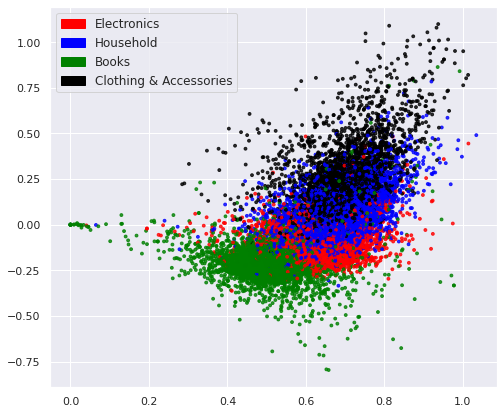

In [ ]:
# Word2Vec embedding
X_train_embed = get_word2vec_embeddings(word2vec, data_train['tokens'])
X_val_embed = get_word2vec_embeddings(word2vec, data_val['tokens'])
X_test_embed = get_word2vec_embeddings(word2vec, data_test['tokens'])

fig = plt.figure(figsize = (8, 7))
plot_embedding(X_train_embed, y_train)
plt.show()

In [ ]:
# Converting to Compressed Sparse Row matrix
X_train_w2v = scipy.sparse.csr_matrix(X_train_embed)
X_val_w2v = scipy.sparse.csr_matrix(X_val_embed)
X_test_w2v = scipy.sparse.csr_matrix(X_test_embed)

In [ ]:
# Summary of baseline models
score(X_train_w2v, y_train, X_val_w2v, y_val, names = names, models = models)


,Classifier,Training accuracy,Validation accuracy
2,Linear SVM,0.937233,0.934173
3,Random Forest,0.999910,0.928417
4,XGBoost,0.938537,0.921583
0,KNN Classifier,0.913268,0.912590
1,Decision Tree,0.999955,0.812230


In [ ]:
# Hyperparameter tuning for linear SVM
svm_classifier = svm.SVC()
params_svm = {
    'kernel': ['linear'],
    'C': [0.1, 1, 10, 100]
}

best_model_svm, best_params_svm, best_score_svm, count = svm_classifier, ParameterGrid(params_svm)[0], 0, 0
for g in ParameterGrid(params_svm):
    time_start = time.time()
    count += 1
    print(f"Gridpoint #{count}: {g}")
    svm_classifier.set_params(**g)
    svm_classifier.fit(X_train_w2v, y_train)
    y_train_pred, y_val_pred = svm_classifier.predict(X_train_w2v), svm_classifier.predict(X_val_w2v)
    score_train, score_val = accuracy_score(y_train, y_train_pred), accuracy_score(y_val, y_val_pred)
    time_stop = time.time()
    m, s = int(time_stop - time_start) // 60, int(time_stop - time_start) % 60
    print(f"Training accuracy: {score_train}, Validation accuracy: {score_val}, Runtime: {m}m{s}s")
    print(" ")
    if score_val > best_score_svm:
        best_params_svm, best_score_svm = g, score_val

best_model_w2v, best_params_w2v, best_score_w2v = svm.SVC(), best_params_svm, best_score_svm
best_model_w2v.set_params(**best_params_w2v)
print(f"Best model: {best_model_w2v}")
print(" ")
print(f"Best parameters: {best_params_w2v}")
print(f"Best validation accuracy: {best_score_w2v}")

Gridpoint #1: {'C': 0.1, 'kernel': 'linear'}
Training accuracy: 0.922665347781125, Validation accuracy: 0.9190647482014388, Runtime: 3m31s
 
Gridpoint #2: {'C': 1, 'kernel': 'linear'}
Training accuracy: 0.93723303808282, Validation accuracy: 0.9341726618705036, Runtime: 1m59s
 
Gridpoint #3: {'C': 10, 'kernel': 'linear'}
Training accuracy: 0.9468998696101794, Validation accuracy: 0.9366906474820144, Runtime: 1m37s
 
Gridpoint #4: {'C': 100, 'kernel': 'linear'}
Training accuracy: 0.9502270581358752, Validation accuracy: 0.9298561151079137, Runtime: 1m57s
 
Best model: SVC(C=10, kernel='linear')
 
Best parameters: {'C': 10, 'kernel': 'linear'}
Best validation accuracy: 0.9366906474820144


In [ ]:
# Function to compute and print confusion matrix
def conf_mat(y_test, y_test_pred, figsize = (10, 8), font_scale = 1.2, annot_kws_size = 16):
    class_names = [0, 1, 2, 3] # ['Electronics', 'Household', 'Books', 'Clothing & Accessories']
    tick_marks_y = [0.5, 1.5, 2.5, 3.5]
    tick_marks_x = [0.5, 1.5, 2.5, 3.5]
    confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    confusion_matrix_df = pd.DataFrame(confusion_matrix, range(4), range(4))
    plt.figure(figsize = figsize)
    sns.set(font_scale = font_scale) # label size
    plt.title("Confusion Matrix")
    sns.heatmap(confusion_matrix_df, annot = True, annot_kws = {"size": annot_kws_size}, fmt = 'd') # font size
    plt.yticks(tick_marks_y, class_names, rotation = 'vertical')
    plt.xticks(tick_marks_x, class_names, rotation = 'horizontal')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)
    plt.show()

In [ ]:
# Best model
if best_score_tfidf >= best_score_w2v:
    best_model, X_train_vec, X_test_vec = best_model_tfidf, X_train_tfidf, X_test_tfidf
else:
    best_model, X_train_vec, X_test_vec = best_model_w2v, X_train_w2v, X_test_w2v

Test accuracy    0.949299
 


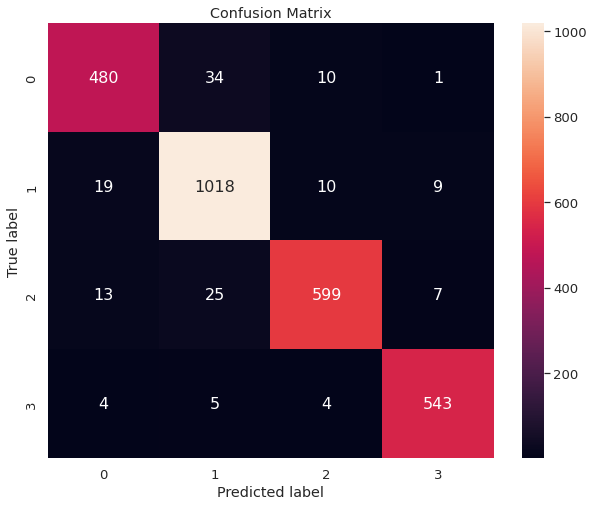

In [ ]:
# Prediction and evaluation on test set
best_model.fit(X_train_vec, y_train)
y_test_pred = best_model.predict(X_test_vec)
score_test = accuracy_score(y_test, y_test_pred)
print(pd.Series({"Test accuracy": score_test}).to_string())
print(" ")
conf_mat(y_test, y_test_pred, figsize = (10, 8), font_scale = 1.2, annot_kws_size = 16) # Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
y_test_pred = best_model.predict(X_test_vec)
cm=confusion_matrix(y_test, y_test_pred, labels=[0,1,2,3])
print(cm)
print()

from sklearn.metrics import classification_report
target_names = ['0','1','2','3']
print(classification_report(y_test, y_test_pred, target_names=target_names))

[[ 480   34   10    1]
 [  19 1018   10    9]
 [  13   25  599    7]
 [   4    5    4  543]]

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       525
           1       0.94      0.96      0.95      1056
           2       0.96      0.93      0.95       644
           3       0.97      0.98      0.97       556

    accuracy                           0.95      2781
   macro avg       0.95      0.95      0.95      2781
weighted avg       0.95      0.95      0.95      2781



In [ ]:
#error analysis
err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]==3 and y_test_pred[i]==0):
        print(X_test_norm[i])
        err_cnt = err_cnt+1
print("errors:", err_cnt)

keetron pu leather tpu wrist strap credit card holder flip folio shockproof cover closure slim protector note orange redmi note redmi note antiscratch transparent tpupc back tpu side case keetronextreme profile note redmi note case surround edge cover phone body protection front back phone pocket purse well include volume mute switch case make life moment scratch bump shock dirt wear compartment precise cutout speaker camera port allow easily access port take case slim tpu pu leatherpu leather ecofriendly deteriorate tpu flap provide protection cellphone case lookkeetron provide satisfaction product customer issue product please contact fulfill request promptly hassle
lg phone caselg grace lte case screen protectoranoke cute protective cell phone cover girl woman lg ch phone modelslg case caselg case lg harmony caselg case grace lte case tmobileat verizon sprint tmobile cellularmetropcscricketvirgintracfoneboost anoke brand caseultra transparent slim cover case come case hd screen prot

In [ ]:
#error analysis
err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]==3 and y_test_pred[i]==1):
        print(X_test_norm[i])
        err_cnt = err_cnt+1
print("errors:", err_cnt)

india shawl kutch embroider border mirror dimension ft ft
chronex ponytail hair band holder rubber band girlswomen hair band tool hold hair tightly metal hurt hair thickness well hold style purse workout bag change look instantly hair worry hair slippage quantity meet family need
piece mermaid glitter cupcake cake pick decoration baby shower birthday party favor mermaid seahorse food pick package include pc mermaid tail pc pc seahorse topper
hornbull man leather wallet belt hornbull help people world easily simply quality wallet card case passport holder reason get hornbull product design size feel contrast wallet keep longterm use year decade support quality name brand top grain leather product try product item stock ship everyone use product come back something right product make grain leather proud say product make wallet card case passport holder handcraft kolkata india product get well age come quality follow standard find product hornbull banner
packit traveler lunch bag polka do

In [ ]:
#clothing as books
err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]==3 and y_test_pred[i]==2):
        print(X_test_norm[i])
        err_cnt = err_cnt+1
print("errors:", err_cnt)

deal man suspender neck bow suspender lowestpricedeal toped selling know everybody caresso come lot collection suspender convert style suspender look hip statement look want choose design lowestpricedeal store suspender also well personality sense style proud weight granteed put mind always try well bring premium quality suspender know everybody search kind stuff get absolutely feel suspender also lightweight much time want suspender way matter go way look surprised know time visit store keep suspender believe run mill
eccellente fedora hat design sale diwali offer
spiderman glove disc fan crawl marvel superhero spiderman glove disc launcher surely become see child save disc throw glove craft quality material colour child play
man adriano running shoe bear part name founder brand name lotto sport world research design innovation accompany lozenge figure represent partially playing field company policy commit begin soccer tennis inclination towards sportthe lotto logo create variation m

In [ ]:
err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]==0 and y_test_pred[i]==1):
        print(X_test_norm[i])
        err_cnt = err_cnt+1
print("errors:", err_cnt)

morpho icon fingerprint scanner service version product description detail feature maintenance design capture highquality fingerprint image ambient rejection platen area framessecond image capture fully auto capture brightness contrast gain function fingerprint detection fbi mobile fap fip piv specification resolution ppi illumination automatically platen area mm area scale level interfacepower datum power operate temperature humidity weight lbs kg dimension mm system requirement window linux ghz cpu mb ram port card specification size cm cm cm weight aluminium casing resolution level grayscale framessecond image capture datum power window xp detail brandsafran morpho series item weight item model series model morpho mso include finger scanner battery include
readat sheet mm thickness elevator write desk height smoke colour readat provide quality product readat give quality assurance size inch topwrite desk elevatorlaptop table fully height quality mm smoke sheet day warranty elevator 

In [ ]:
err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]==0 and y_test_pred[i]==2):
        print(X_test_norm[i])
        err_cnt = err_cnt+1
print("errors:", err_cnt)

basher dinosaur bare bone author simon basher creator illustrator ten concept book child include physics biology math punctuation base tokyo specialize surrealism basher artwork regularly exhibit europe asia dan edit basher periodic author physics biology rock mineral study geology cambridge university
ecodeal vermicompost fertilizer kg vermicompost make earthworm decompose cow dung waste
shutter huggers monkey hugger style shutter hugger monkey
emergency chronicle indira gandhi democracy turning point author prakash daytonstockton professor history princeton university member subaltern study dissolution recipient endowment humanity fellowship author book include reason widely mumbai adapt film bombay velvet story cowrote screenplay life princeton jersey
gift year prime
karaoke microphone ahuja research development centre recognise government india take pride develop product know reliability even operate condition microphone use purpose
antenna theory analysis design wiley interscience

In [ ]:
err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]==0 and y_test_pred[i]==3):
        print(X_test_norm[i])
        err_cnt = err_cnt+1
print("errors:", err_cnt)

cross coverage product description coverage style feature provide cup seperation support branddescription start corset factory today country world brand start operation india city product range include fashion line tshirt bra range sportswear well line
errors: 1


In [ ]:
err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]==1 and y_test_pred[i]==0):
        print(X_test_norm[i])
        err_cnt = err_cnt+1
print("errors:", err_cnt)

gbs wifi attendance system cloud storage lifetime maintenance ios support report globally
ceuta combo offer stand bracket phone stand metal lazy stand use quality ab design beddesktop mobile mount holder watch moviesvideos music bed hold phone arm angle distance view angle convenience invention metal stand specially phone add effect moviegoe experience come gooseneck clip clamp mount suction cup mount use bed car desk table window shield surface lazy phone support release alloy sell package mope entertainment clamp line silicone padit come universal attachment use follow inclination rotate collet demand angle
sellnship travel adaptor allinone world conversion plug aus europe sp device style travel abroad study business trip vacation carry gadget charge regularly system country world universal charger adapter plug help charge gadget outlet country travel charger country include states kingdom japan volt watt adapter builtin surge protector keep appliance spike flow voltage frequency abr

In [ ]:
err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]==1 and y_test_pred[i]==2):
        print(X_test_norm[i])
        err_cnt = err_cnt+1
print("errors:", err_cnt)

latch import jimi lead group call band gypsy quartet parisbase gypsy guitarist thing steeve lafonte leave channel yorgui loeffler center campion right channel bassist gino roman come together reverently always swinge legacy belgiangitano django reinhardt music century invention dimension course death django reinhardt gypsy jazz never cease michel mercier cd liner note play album decide keep mind essence creator capacity tell story music play mere play style never emotion sensitivity sake technique achieve spend month together play music work enjoy night fruit effort aurally fourteentrack masterpiece campion course maestro composition thirty feature include pace nuits saintgermaindesprés pêche à la mouche rythme composition swing era eddie durham chestnut topsy harlem globetrotter theme song isham jonesgus khan number see highlight foursome pulsation span manhattan rendition michel legrand score jacque film les parapluies cherbourg chick corea popfusion get band lp roman romano afrocuba

In [ ]:
err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]==1 and y_test_pred[i]==3):
        print(X_test_norm[i])
        err_cnt = err_cnt+1
print("errors:", err_cnt)

snezhinka silk cover charmeuse weave momme size colour pillow cover make silk fabric charmeuse weave momme use silk cover sleep help retain look delay appearance damage dryness silk keep skin hydrated night gentle skin also keep bedhead control hair thereby reduce hair damage end breakage dryness etc silk retain moisture hair keep tangle night blowout curl style do hair property include resistance dust mite fungus mold addition allergen fabric care hand wash use detergent wring bleach
york pearl colourpearl formula oil sweat give look day time bid goodbye touchup stay hour
barbie frock baby girl empire maxi dress pastel blue flower gown
charm anklet woman show fashion sense foot uniquely anklet charm crop trouser tealength skirt way flaunt
dimension baby hugs fairy bibs stamp cross stitch set baby hug stamp cross stitch cute cuddly baby design fabric bring dimension crafts kit contain preprinte design polycotton quilted cotton thread instruction finish size design fairy bib designer wi

In [ ]:
err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]==2 and y_test_pred[i]==0):
        print(X_test_norm[i])
        err_cnt = err_cnt+1
print("errors:", err_cnt)

lead hd projector hd display change living room movie theatre get design lead lcd home projector display color highdefinition image optimize contrast ratio egate projector change ambience room extent provide picture home produce even image replace television take room country number projector brand egate crisil rate company certification peace mind end home theater lead lcd projector boast hd screen resolution support color contrast image quality quality lcd panel industry give crystal image detail design picture movie mode choose suit customize desire video streaming idiot box software mate deliver unmatched streaming medium experience world create phone develop projector enough take video content device stream metre inch keep explore play projector mean projector connect function play plug data pen hdd msd watch movie see picture music make india heat fluctuation proof projector make country heat dust power problem rd team develop technology keep mind condition engine prevent dust ga

In [ ]:
err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]==2 and y_test_pred[i]==1):
        print(X_test_norm[i])
        err_cnt = err_cnt+1
print("errors:", err_cnt)

book coconut product cultivation processing coconut crop grow india presently cover country find tropic area coconut know versatility see use part coconut part people endosperm initially phase suspend water development continue layer deposit wall coconut become coconut call copra oil milk derive commonly use cooking fry coconut oil also widely use liquid coconut water refreshing drink process create alcohol husk leave use make variety product decorate also significance society stand production coconut world book product diversification coconut coconut oil scope product diversification variety coconut farming system coconut farming coconut spice herb maintenance coconut plantation production spice plant crop improvement manuring coconut garden recycling coconut soil moisture conservation coconut garden harvest post harvest technology integrate farming holding productivity improvement machinery processing desiccate coconut coconut processing sector india etc book contain cultivation proc

In [ ]:
err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]==2 and y_test_pred[i]==3):
        print(X_test_norm[i])
        err_cnt = err_cnt+1
print("errors:", err_cnt)

anne frank girl take day
bell sock man train crew
chimes doctor man eye collection woman chime bring fashion jewellery design renowned jewellery manufacturer world price assure remove middleman margin realestate expense directly purchase manufacturer fashion jewellery customer
chhattisgarh pet product make color feature pu laceup closure toe design use occasion well office footwear furthermore keep heat liquid avoid damage
woman cap
tinkle pack pack include ever tinkle series
compression activity reduce postexercise muscle soreness improve performance microfiber spandexwarpknit construction offer compression durability microfiber construction wick moisture away temperature hem gripper tape bond ensure comfort
errors: 7
